
 ⚡⚡⚡
1. A clear and logical project structure. 
- Overview/Exec summary 
 
- Data cleaning + transformation 
 
- EDA/Analysis 
 
- Recommendations 
 
2. Focus more on the analysis than the tool. 
 
3. Keep it short and concise. 
  
4. Consider data visualisation. 


# Time Series Modeling: Romanian Electricity

## Overview
- This project will attempt to build an ARIMA model on hourly electricity consumption and production rates for Romania from 2019 to mid-March 2023.

Analysis will attempt manual and auto-ARIMA derivations of 

- **P**: lag order (AutoRegressive Component - AR)
- **D**: degree of differencing (Integragtion Component - I)
- **Q**: order of the moving average (Moving Average Component - MA)
---

[Data Source](https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production)

Table Data
All values in MegaWatts (MW)

| Fields | Interpretation | Example |
| --- | --- | --- |
| DateTime | Hourly Timestamp | 1/1/2019  7:00:00 AM |
| Consumption | Total Romanian Energy Consumption (MW) | 5524 |
| Production | Total Romanian Energy Production (MW) | 5547 |
| Nuclear | Total Romanian Nuclear Energy Consumption (MW) | 1392 |
| Wind | Total Romanian Wind Energy Production (MW) | 93 |
| Hydroelectric | Total Romanian Hydroelectric Energy Production (MW) | 1187 |
| Oil and Gas | Total Romanian Oil and Gas Energy Production (MW) | 1446 |
| Coal | Total Romanian Coal Energy Production (MW) | 1394 |
| Solar | Total Romanian Solar Energy Production (MW) | 0 |
| Biomass | Total Romanian Biomass Energy Production (MW) | 34 |

## Overview / Executive Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
import matplotlib.pyplot as plt

#Load the CSV file as dataframe, df
os.chdir(r"C:\Users\Public\Documents")
df = pd.read_csv("electricityConsumptionAndProductioction.csv", index_col='DateTime', parse_dates=True)

# Confirm loading CSV
# Look at the dataframe structure

print(df.info())
print(df.describe())

df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36772 entries, 2019-01-01 00:00:00 to 2023-03-12 23:00:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Consumption    36772 non-null  int64
 1   Production     36772 non-null  int64
 2   Nuclear        36772 non-null  int64
 3   Wind           36772 non-null  int64
 4   Hydroelectric  36772 non-null  int64
 5   Oil and Gas    36772 non-null  int64
 6   Coal           36772 non-null  int64
 7   Solar          36772 non-null  int64
 8   Biomass        36772 non-null  int64
dtypes: int64(9)
memory usage: 2.8 MB
None
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   1293.468590    785.700723    1801.603149   
std     1034.961146   1005.486125    237.348752    681.508967     678.981785   
min     4081.000000   3315.00000

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


## Data Cleaning & Transformation
- I trust that outliers are real due to national level monitoring systems

1. Check for duplicates and missing values
     - Time series data cannot have missing values
     - Initial glimpse at data above suggests no missing values (36,772 values across all fields)
2. Convert DateTime to a timestamp data type
   - Potentially Aggregate into daily averages depending on computing power

In [2]:
# Check for any missing values
df.isnull().values.any()

False

In [3]:
# No missing records

# Check for any Duplicates
df.duplicated().values.any()

True

In [4]:
# Identify duplicates
df[df.duplicated()]

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-03-02 22:00:00,7538,7277,1391,288,1762,1506,2271,0,59
2019-03-02 23:00:00,7538,7277,1391,288,1762,1506,2271,0,59
2019-03-03 00:00:00,7538,7277,1391,288,1762,1506,2271,0,59
2019-06-07 16:00:00,7039,7034,659,151,3968,434,1147,647,29
2019-06-07 17:00:00,7039,7034,659,151,3968,434,1147,647,29
...,...,...,...,...,...,...,...,...,...
2023-01-16 04:00:00,5604,6878,1402,1304,1569,1624,913,0,66
2023-01-16 05:00:00,5604,6878,1402,1304,1569,1624,913,0,66
2023-01-19 19:00:00,7598,9148,1408,2709,2344,1439,1178,0,70


In [5]:
# 4 duplicate records
# Drop duplicates, keep one record
df.drop_duplicates(inplace = True)

# Check for any Duplicates
df.duplicated().values.any()

False

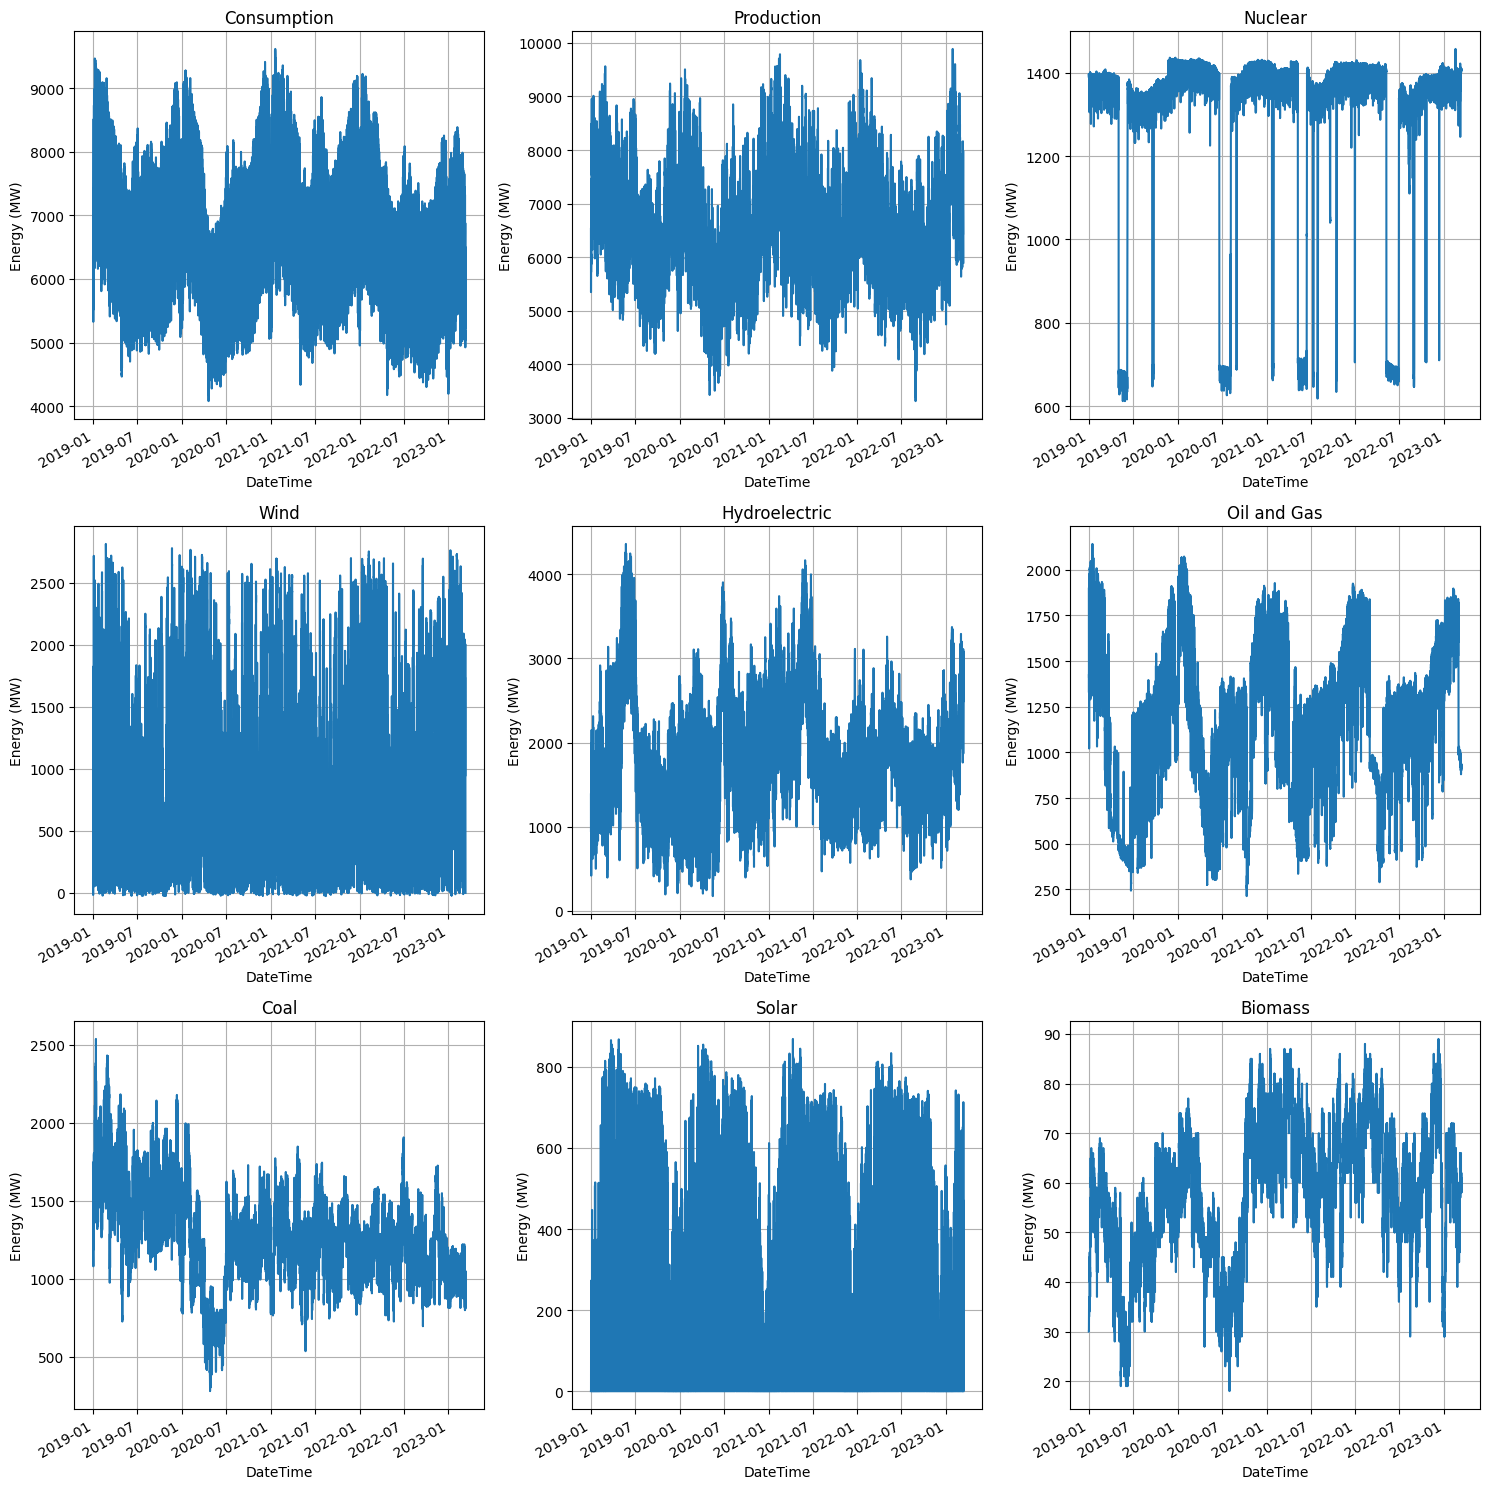

In [6]:
# Plot Romainian Energy 
fig,axs = plt.subplots(3,3, figsize = (15,15))

columns_to_plot = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Iterate over the columns and plot each one on a separate subplot
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    df[column].plot(grid=True, ax=ax)
    ax.set_title(column)
axs[0,0].set_ylabel('Energy (MW)')
axs[0,1].set_ylabel('Energy (MW)')
axs[0,2].set_ylabel('Energy (MW)')
axs[1,0].set_ylabel('Energy (MW)')
axs[1,1].set_ylabel('Energy (MW)')
axs[1,2].set_ylabel('Energy (MW)')
axs[2,0].set_ylabel('Energy (MW)')
axs[2,1].set_ylabel('Energy (MW)')
axs[2,2].set_ylabel('Energy (MW)')

fig.tight_layout()


### Data Cleaning Complete
- Duplicates Removed
- DateTime column is converted to Index with date parsing

## Model Development
### Time Series Assumptions
- Stationarity
  - Normally distributed
  - Mean and variance are constant over time
  - No trends
  - Constant variance and autocorrelation
- Radnomly distributed Error Term
- No Outliers
- Residuals are **not** autocorrelated

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf, acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [8]:
# Check stationarity
results = adfuller(df['Consumption'])

print('Test Statistics: ', results[0])
print('p-value: ', results[1])
print('# of lags: ', results[2])
print('Crticial Values: ', results[4])

# p-value is <0.05 on non differenced data
# I = 0

Test Statistics:  -13.947571492854333
p-value:  4.766499535452963e-26
# of lags:  52
Crticial Values:  {'1%': -3.4305303077713565, '5%': -2.861619691667109, '10%': -2.566812417354478}


In [9]:
# Check stationarity
if results[1]<= 0.05:
    print('Reject null hypothesis, the time series is stationary')
else:
    print("Fail to reject null hypothesis, the time series in not stationary")

Reject null hypothesis, the time series is stationary


In [10]:
# Spit data for holdout testing
print(round(0.7*df.shape[0]) + round(0.3*df.shape[0]) == df.shape[0])
train = df.iloc[:-round(0.3*df.shape[0])]    # take out the last 30% of the data
test = df.iloc[-round(0.3*df.shape[0]):] # include the last 30% of the data 
print(train.shape, test.shape)

True
(25426, 9) (10897, 9)


# Progress Bar
---
3-30-2024
Notes to self
- INDEX needs a frequency (hourly)
  - [X] Fixed with date parse on read csv
- Seasonality
  - [X] None according to auto ARIMA
- Trends
- Decomposition
- Periodogram
- Residual Spectral Density

- Forecasting
- Accuracy Metric? AIC

## Auto-ARIMA

In [70]:
# pip install pmdarima
# Run the ARIMA model on training data
from pmdarima.arima import auto_arima
model_auto = auto_arima(train['Production'], trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=340861.138, Time=13.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=349682.863, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=342713.005, Time=1.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=344287.248, Time=4.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=349680.863, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=342628.339, Time=2.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=342682.041, Time=6.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=340481.619, Time=23.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=340907.669, Time=16.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=340911.601, Time=26.82 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=340854.391, Time=29.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=340830.149, Time=49.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=340875.852, Time=29.22 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=36.12 sec
 ARI

In [71]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                25426
Model:               SARIMAX(3, 1, 2)   Log Likelihood             -170233.062
Date:                Sun, 05 May 2024   AIC                         340478.124
Time:                        17:04:54   BIC                         340526.985
Sample:                             0   HQIC                        340493.926
                              - 25426                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2824      0.006    354.735      0.000       2.270       2.295
ar.L2         -1.6846      0.012   -139.285      0.000      -1.708      -1.661
ar.L3          0.3599      0.006     57.985      0.000       0.348       0.372
ma.L1         -1.8981      0.003   -620.429      0.000      -1.904      -1.892
ma.L2          0.9502      0.003    318.522      0.000       0.944       0.956
sigma2      4.035e+04    258.303    156.208      0.000    3.98e+04    4.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):              8333.65
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.44
Prob(H) (two-sided):                  0.31   Kurtosis:                         5.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction

In [75]:
df.tail()
index_future_dates = pd.date_range(start = '2021-12-13 09:00:00', end = '2024-03-13 00:00:00', freq = 'H')
print(index_future_dates)
pred = model_auto.predict(n_periods= 19696)

pred.index= index_future_dates
print(pred)

DatetimeIndex(['2021-12-13 09:00:00', '2021-12-13 10:00:00',
               '2021-12-13 11:00:00', '2021-12-13 12:00:00',
               '2021-12-13 13:00:00', '2021-12-13 14:00:00',
               '2021-12-13 15:00:00', '2021-12-13 16:00:00',
               '2021-12-13 17:00:00', '2021-12-13 18:00:00',
               ...
               '2024-03-12 15:00:00', '2024-03-12 16:00:00',
               '2024-03-12 17:00:00', '2024-03-12 18:00:00',
               '2024-03-12 19:00:00', '2024-03-12 20:00:00',
               '2024-03-12 21:00:00', '2024-03-12 22:00:00',
               '2024-03-12 23:00:00', '2024-03-13 00:00:00'],
              dtype='datetime64[ns]', length=19696, freq='H')


C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2021-12-13 09:00:00    7034.229246
2021-12-13 10:00:00    7142.541626
2021-12-13 11:00:00    7234.621866
2021-12-13 12:00:00    7304.152948
2021-12-13 13:00:00    7346.713377
                          ...     
2024-03-12 20:00:00    6916.328929
2024-03-12 21:00:00    6916.328929
2024-03-12 22:00:00    6916.328929
2024-03-12 23:00:00    6916.328929
2024-03-13 00:00:00    6916.328929
Freq: H, Length: 19696, dtype: float64


In [105]:
# Run an ARIMA model
model_manual = ARIMA(train['Consumption'], order = (0,0,0))
model_manual = model_manual.fit()
model_manual.summary()


C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                25426
Model:                          ARIMA   Log Likelihood             -328767.518
Date:                Sun, 05 May 2024   AIC                         657539.036
Time:                        17:22:25   BIC                         657555.323
Sample:                             0   HQIC                        657544.304
                              - 25426                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6793.0080   1.65e+05      0.041      0.967   -3.16e+05    3.29e+05
sigma2       2.71e+10    3.4e+08     79.725      0.000    2.64e+10    2.78e+10
===================================================================================
Ljung-Box (L1) (Q):               23393.95   Jarque-Bera (JB):               565.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
start = len(train)
end = len(train)+len(test)-1
pred_manual.index = index_future_dates
pred_manual = model_manual.predict(start = '2021-12-13 09:00:00', end = '2021-01-01 00:00:00')

# Assign the future dates index to the prediction
#pred_manual.index = 
print(pred_manual)

ValueError: Length mismatch: Expected axis has 10897 elements, new values have 19696 elements

In [15]:
# Make predictions
start = len(train)
end = len(train)+len(test)-1
pred=model.predict(start=start, end=end, type='levels')
print(pred)

# set an index for plotting
pred.index=df.index[start:end+1]

C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeE

25426    6793.007984
25427    6793.007984
25428    6793.007984
25429    6793.007984
25430    6793.007984
            ...     
36318    6793.007984
36319    6793.007984
36320    6793.007984
36321    6793.007984
36322    6793.007984
Name: predicted_mean, Length: 10897, dtype: float64


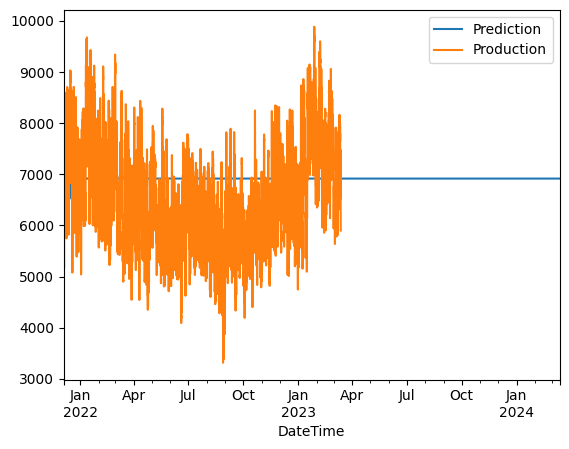

In [80]:
pred.plot(legend=True, label = 'Prediction')
test['Production'].plot(legend = True)
plt.show()

In [17]:
# RMSE accuracy metric
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Production']))
print(rmse)

1026.1082608607837


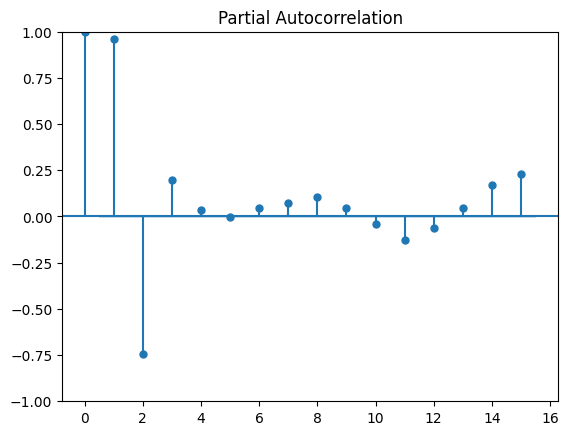

In [66]:
plot_pacf(df['Consumption'], lags=15)
plt.show()
# P = 0

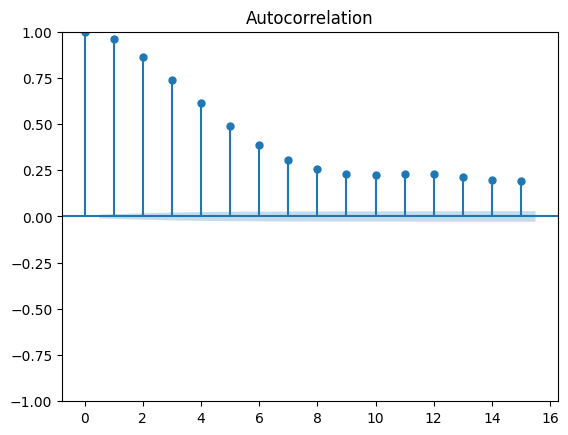

In [67]:
plot_acf(df['Consumption'], lags=15)
plt.show()
#Q = 0

In [20]:
acf(df['Production'])

array([1.        , 0.97435096, 0.92496573, 0.86311106, 0.79678016,
       0.73121265, 0.67019253, 0.6173746 , 0.57499211, 0.54543702,
       0.52536561, 0.51074914, 0.49781504, 0.48539702, 0.47479066,
       0.46984433, 0.47477161, 0.4929815 , 0.52154797, 0.55776619,
       0.59784307, 0.63845605, 0.67518799, 0.70088253, 0.70650503,
       0.68258733, 0.64015875, 0.5881358 , 0.53379659, 0.48108826,
       0.43321616, 0.39342773, 0.36322587, 0.34407643, 0.33326419,
       0.32688965, 0.32154559, 0.31640773, 0.31271234, 0.31387563,
       0.32354175, 0.34465488, 0.37459734, 0.41165392, 0.45223246,
       0.4926934 ])

### Auto-Arima Prediction Model

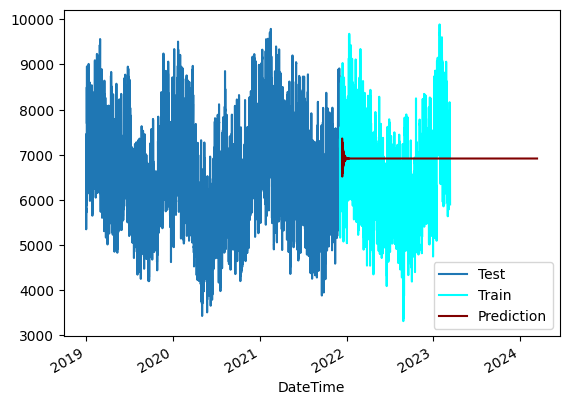

In [76]:
train['Production'].plot(legend=True, label = 'Test')
test['Production'].plot(legend=True, label = 'Train', color = 'aqua')
pred.plot(legend=True, label = 'Prediction', color = 'maroon')
plt.show()

## Reccomendations

In [73]:
test.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2021-12-04 09:00:00,7755,7183,1423,1349,1205,1778,1298,60,68
2021-12-04 10:00:00,7787,7356,1420,1232,1362,1822,1326,123,70
2021-12-04 11:00:00,7916,6939,1420,1178,1067,1815,1228,161,68
2021-12-04 12:00:00,7743,6879,1421,1031,1072,1795,1295,195,68
2021-12-04 13:00:00,7554,6625,1422,892,985,1767,1297,191,68
